# XGBoost for Feature Selection

In [17]:
# importing necessary libraries
import sklearn
import pandas as pd
import numpy as np
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot
from xgboost import plot_importance

In [18]:
# Cheecking version of the sklearn
print(sklearn.__version__)

1.1.0


In [19]:
# Loading the dataset
df = pd.read_csv("aafc_data.csv")

In [20]:
df.head()

,Unnamed: 0,TWP_ID,ECODISTRICT_ID,YEAR,YieldKgAcre,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,...,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,0,00101E1,852.0,2010,867.766846,53.6,111.1,109.7,117.9,46.4,...,16.960125,18.766207,17.186998,15.461519,19.738222,22.958089,27.206203,26.480087,28.678156,26.308484
1,1,00101W1,852.0,2010,673.685028,57.2,114.7,110.5,114.0,46.2,...,16.328520,17.926029,16.787544,14.779726,20.245149,23.608204,28.560990,27.324254,29.079177,26.927224
2,2,00101W2,796.0,2010,824.303864,39.0,96.4,109.8,101.2,111.4,...,13.117879,12.869142,12.831834,14.126196,16.385776,18.650751,20.287069,20.514132,19.564788,16.681692
3,3,00102E1,853.0,2010,1006.708496,37.5,158.2,157.8,161.4,46.9,...,17.060778,18.699156,17.345822,15.998957,20.091525,22.761273,26.337430,25.559602,27.611729,25.575794
4,4,00102W1,852.0,2010,869.040283,57.2,114.7,110.5,114.0,46.2,...,16.050993,17.556860,16.612026,14.480150,20.467884,23.893858,29.156274,27.695178,29.255386,27.199097


In [21]:
# removing columns that are not required.    
df.drop(['Unnamed: 0', 'ECODISTRICT_ID', 'TWP_ID', 'YEAR'], axis=1, inplace=True)

In [22]:
# We have 161 predictors and 1 dependent (response) variable (YieldKgAcre). 
df.shape

(42007, 162)

In [23]:
df.head(2)

,YieldKgAcre,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,SumPcpn26_28,...,SoilMoisture29_31,SoilMoisture30_32,SoilMoisture31_33,SoilMoisture32_34,SoilMoisture33_35,SoilMoisture34_36,SoilMoisture35_37,SoilMoisture36_38,SoilMoisture37_39,SoilMoisture38_40
0,867.766846,53.6,111.1,109.7,117.9,46.4,69.3,60.0,44.6,29.9,...,16.960125,18.766207,17.186998,15.461519,19.738222,22.958089,27.206203,26.480087,28.678156,26.308484
1,673.685028,57.2,114.7,110.5,114.0,46.2,68.1,55.9,34.9,29.6,...,16.328520,17.926029,16.787544,14.779726,20.245149,23.608204,28.560990,27.324254,29.079177,26.927224


In [24]:
# split data into X and y
x = pd.DataFrame(df.drop(labels=['YieldKgAcre'], axis=1))
y = pd.DataFrame(df['YieldKgAcre'])

In [25]:
# fit model no training data
model = XGBRegressor()
model.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [26]:
# feature importance
print(model.feature_importances_)

[0.00050987 0.00160668 0.00287208 0.00561724 0.00428535 0.0033777
 0.00406657 0.00140621 0.00177619 0.00296935 0.0033569  0.00304651
 0.00155687 0.00363787 0.00218789 0.0018836  0.00629961 0.00327708
 0.01074769 0.0156554  0.00583998 0.00338608 0.00261796 0.00932505
 0.06348896 0.0042815  0.00315045 0.00529539 0.00365006 0.00577569
 0.00542576 0.11033399 0.00627645 0.0140404  0.00216296 0.01555622
 0.00139347 0.02646095 0.00684235 0.0049234  0.00488136 0.02632411
 0.00084203 0.0032493  0.00840932 0.00399276 0.00103145 0.0016508
 0.00334194 0.00218801 0.0018541  0.00712768 0.0006356  0.01221102
 0.00269823 0.00133609 0.00052105 0.00277786 0.00542303 0.00186243
 0.00115589 0.00226758 0.00241587 0.06430198 0.00125679 0.00280186
 0.00131471 0.00549932 0.00072392 0.         0.00046659 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00464105 0.00107991 0.0013892  0.00299568 0.02612916
 0.00204466 0.00364619 0.00352839 0.01128327 0.00436784 0.00201525
 0.00333299 0

In [27]:
# Wrangling for getting top 40 features. 
maxv = sorted(range(len(fi)), key=lambda i: fi[i])[-40:]
xcols = x.columns
xcols = xcols.tolist()
fi = model.feature_importances_
fi = fi.tolist()

In [28]:
# Calculating the top 40 festures 
for i in maxv:
    print(xcols[i], "     ", fi[i])

AvgSI29_31       0.004734556656330824
SoilMoisture30_32       0.004810165148228407
SumEGDD_C37_39       0.0048813605681061745
SumEGDD_C36_38       0.004923397675156593
AvgPrcnAWHC30_32       0.005033130757510662
SumEGDD_C24_26       0.005295387469232082
SumHeatD34_36       0.005423027090728283
SumEGDD_C27_29       0.00542575865983963
SumFrostD22_24       0.00549931637942791
SumPcpn21_23       0.005617240443825722
SumEGDD_C26_28       0.005775689613074064
SumPcpn38_40       0.005839983932673931
SumEGDD_C29_31       0.0062764547765254974
SumPcpn34_36       0.006299606058746576
SumEGDD_C35_37       0.006842352915555239
SumHeatD27_29       0.007127676624804735
AvgPrcnAWHC21_23       0.007174764294177294
NDVI30_32       0.007669375743716955
AvgPrcnAWHC36_38       0.007981042377650738
SumHeatD20_22       0.008409315720200539
SumEGDD_C20_22       0.009325048886239529
NDVI29_31       0.009921379387378693
SumPcpn36_38       0.010747694410383701
AvgPrcnAWHC33_35       0.01108767930418253
AvgSI21

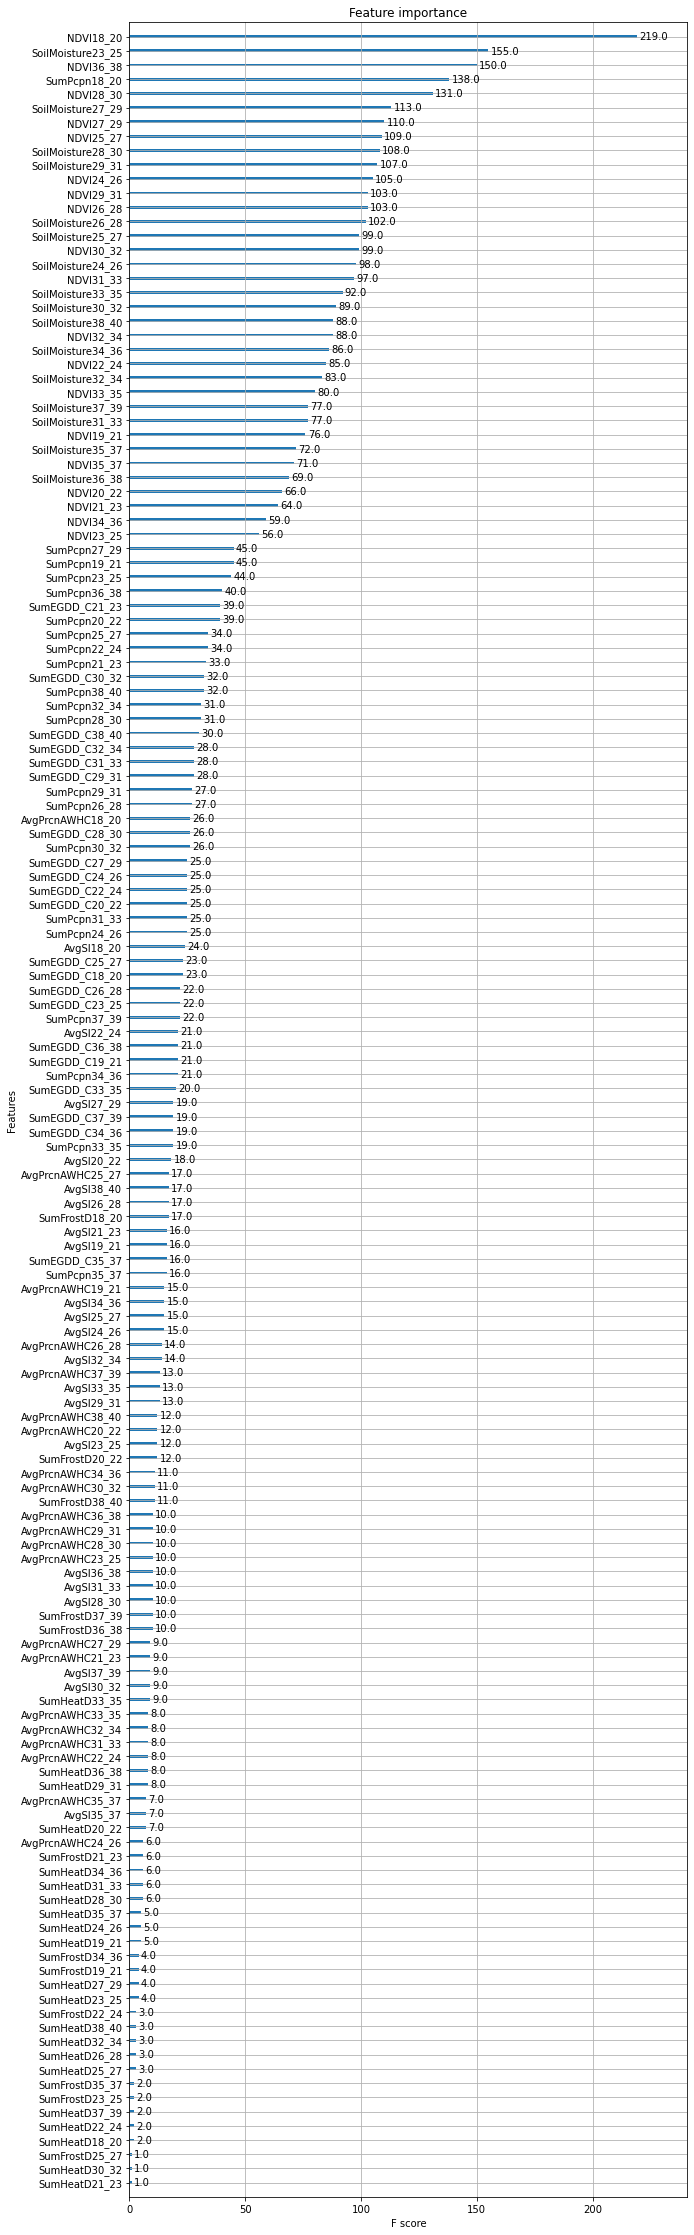

In [30]:
# plot feature importance
fig = plot_importance(model)
pyplot.rcParams["figure.figsize"] = (10,40)

Some wrangling for Heat map 

In [31]:
# l = []
# for i in maxv:
#     l.append(xcols[i])

In [45]:
# c = []
# maxv1 = maxv[30:41]

In [47]:
# for i in maxv1:
#     c.append(xcols[i])